<ul>
<li>Name:Abhishek V Sutrave</li>
<li>Batch:MARCH P-1</li>
<li>Role:Data Science Intern</li>
<li>Company:OASIS INFOBYTE</li>
<li>TASK1:IRIS FLOWER CLASSIFICATION</li>
<li>Objective:-Develop model to accurately classify Iris flowers into species based on sepal,petal measurements.
Utilize machine learning techniques to enhance species identification.</li>
</ul>

In [7]:
#Load Essential Libraries 
#Utilizing Numpy and Pandas for data manipulation and preprocessing 
import numpy as np
import pandas as pd
#Loading visualization libraries for data representation 
import seaborn as sns
import matplotlib.pyplot as plt
#importing library for data preprocessing 
from sklearn.preprocessing import LabelEncoder 
#Importing evaluation metrics for model performance assessment
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,accuracy_score,confusion_matrix
#Importing libraries for model selection and data splitting
from sklearn.model_selection import train_test_split
#Suppressing warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')



### Loading the dataset into a dataframe 

In [8]:
data_1 = pd.read_csv(r"C:\Users\Abhishek\OneDrive\Documents\Iris.csv")


In [9]:
data_1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#Displaying the statistical summary of the dataset
data_1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
#Checking for missing values and datatypes 
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
#Display first 5 rows
data_1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
#display the size 
data_1.shape

(150, 6)

In [28]:
#display any null values 
data_1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
#Dropping the 'id' column as it is not relevant to the analysis
data_1=data_1.drop('Id',axis=1)

In [39]:
#new dataframe
data_1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
data_1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [44]:
#Checking for duplicate rows in dataset 
dup=data_1.duplicated().sum()
print(f'Number of duplicate rows: {dup}')

Number of duplicate rows: 3


 ### Data Visualization


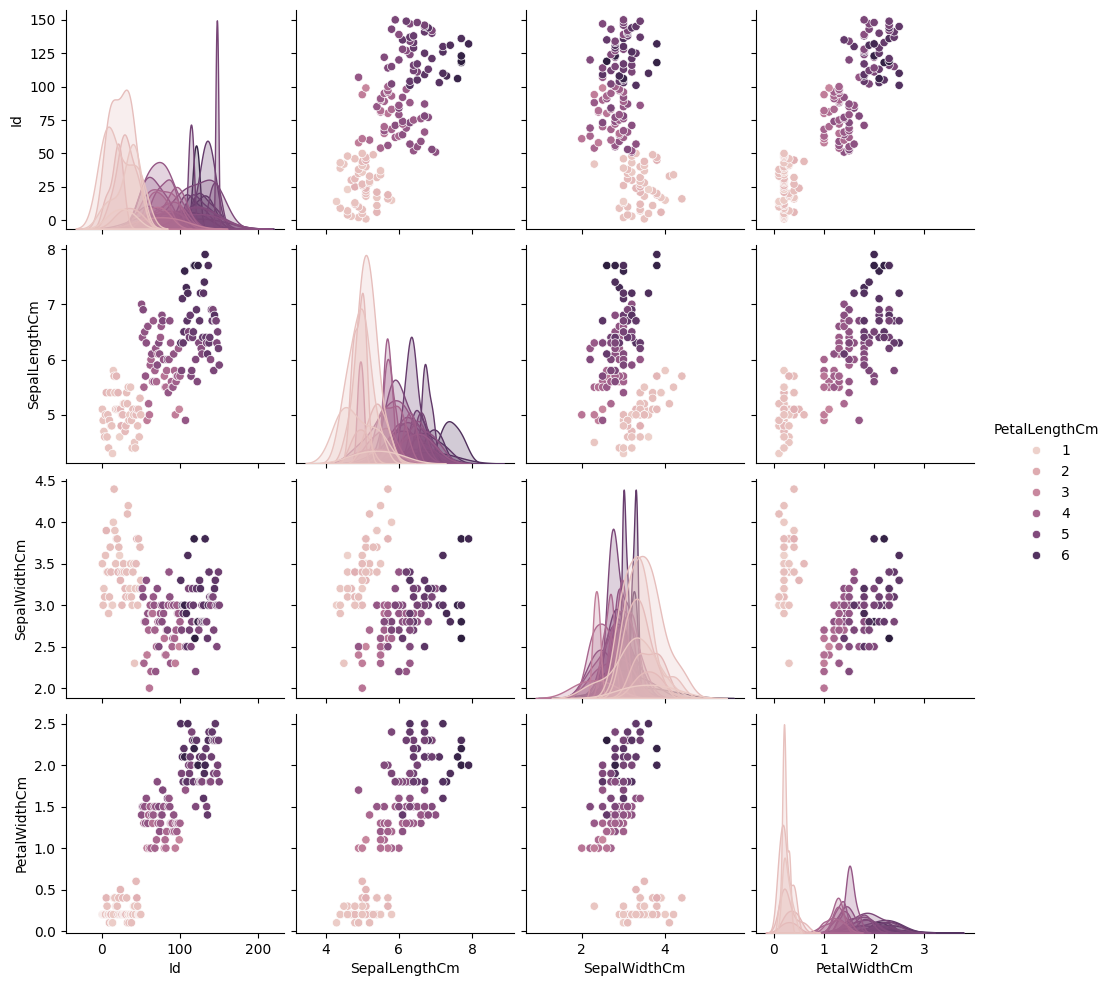

In [6]:

sns.pairplot(data_1,hue='PetalLengthCm')
plt.show()

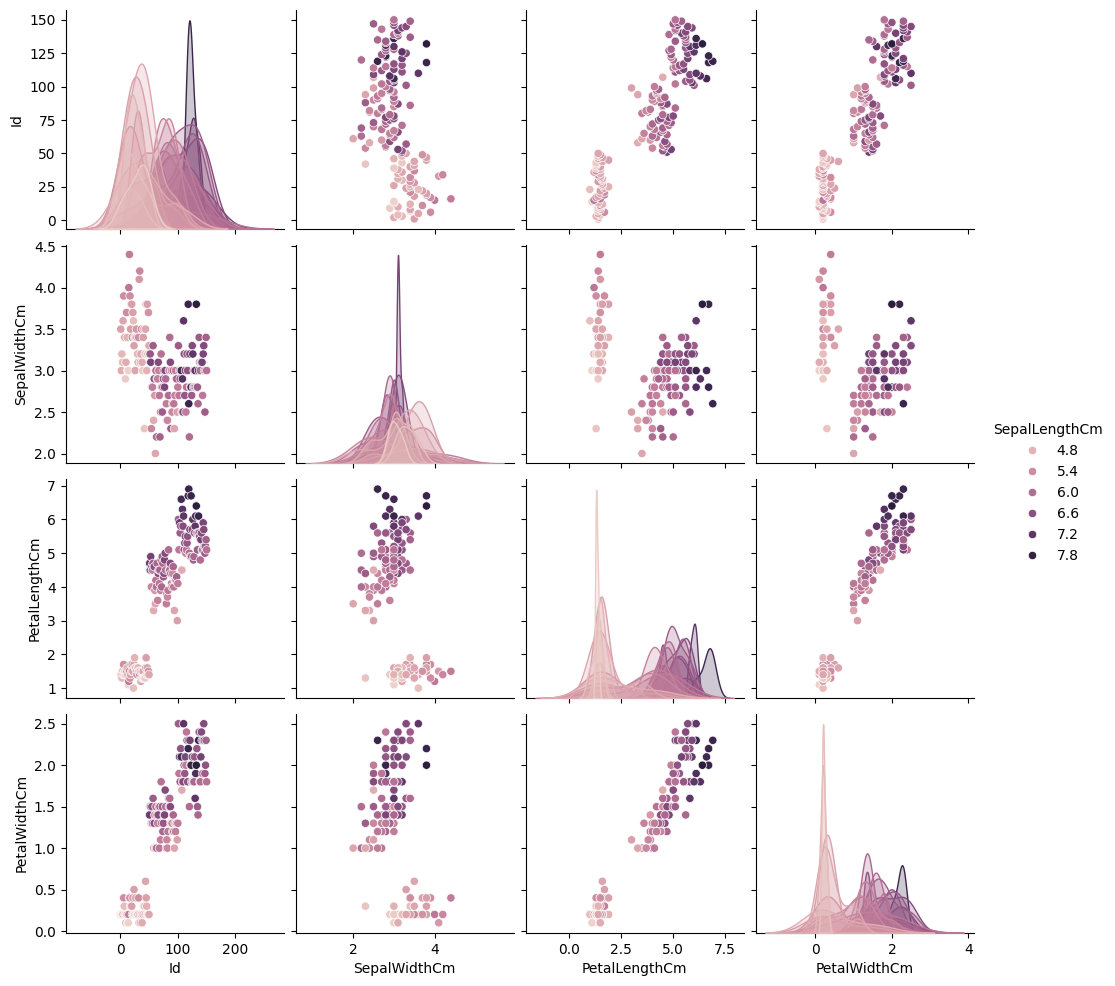

In [7]:
sns.pairplot(data_1,hue='SepalLengthCm')
plt.show()

In [14]:
#Rounding all numerical values in the dataset to 2 decimal places 
data_1.round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
#Displaying the column names of the dataset
data_1.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Accessing the columns from the dataset

In [25]:
data_1["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [23]:
data_1["PetalWidthCm"]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [20]:
data_1["SepalLengthCm"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [21]:
data_1["SepalWidthCm"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

In [22]:
data_1["Id"]

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

### Visualising the distributions

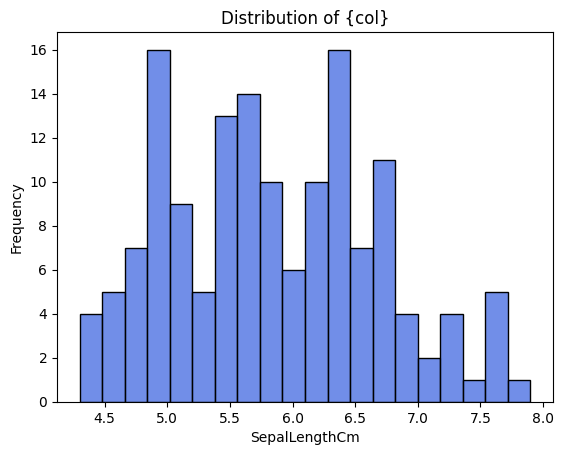

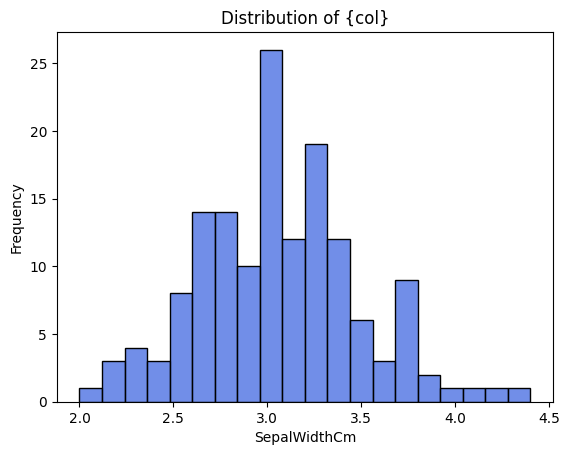

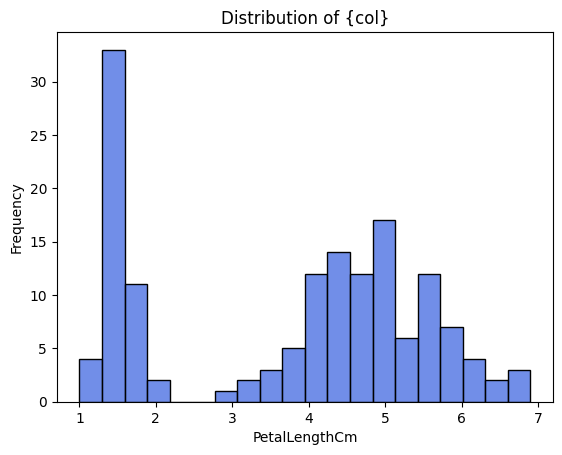

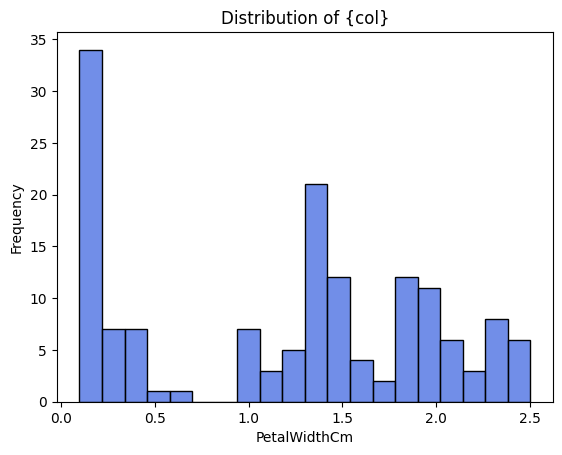

In [41]:
#Plotting a histogram using seaborn
measures =["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for col in measures:
    sns.histplot(data_1[col],bins=20,color="royalblue",edgecolor='black')
    plt.title("Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

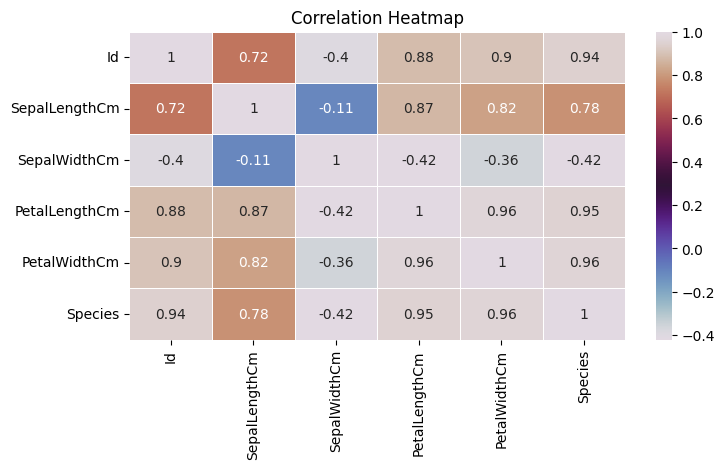

In [10]:
#Convert species to numbers
data_1['Species']=data_1['Species'].astype('category').cat.codes
#Convert to NumPy array
std_dev=data_1.std().values 
#Compute covariance matrix manually
covariance_matrix=data_1.cov().values
correlation_matrix=covariance_matrix /np.outer(std_dev,std_dev)

#Heatmap Visualization
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix,annot=True,cmap='twilight',linewidth=0.5,xticklabels=data_1.columns,yticklabels=data_1.columns)

#Add title and display the heatmap
plt.title('Correlation Heatmap')
plt.show()


### Splitting data into training and testing dataset

In [12]:
# M Represents Features used for training model(input variable)
# n Represents target variable
M = data_1.drop(columns=["Species"])  # Features (sepal length, sepal width) = data_1["Species"]  
n = data_1["Species"].values.reshape(-1,1)  # Target variabes (setosa, virginica)

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the dataset
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.35, random_state=38)

# Checking shapes
print("Training set shape:", M_train.shape)
print("Testing set shape:", M_test.shape)
print("Training labels shape:", n_train.shape)
print("Testing labels shape:", n_test.shape)

# Display first few rows
print(M_train.head())  
print(M_test.head())

# Convert n_train and n_test to DataFrames with column name "Species"
n_train = pd.DataFrame(n_train, columns=["Species"])
n_test = pd.DataFrame(n_test, columns=["Species"])

# Display first few rows of n_train and n_test
print(n_train.head()) 
print(n_test.head())


Training set shape: (97, 5)
Testing set shape: (53, 5)
Training labels shape: (97, 1)
Testing labels shape: (53, 1)
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145  146            6.7           3.0            5.2           2.3
81    82            5.5           2.4            3.7           1.0
32    33            5.2           4.1            1.5           0.1
120  121            6.9           3.2            5.7           2.3
127  128            6.1           3.0            4.9           1.8
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
48    49            5.3           3.7            1.5           0.2
113  114            5.7           2.5            5.0           2.0
111  112            6.4           2.7            5.3           1.9
44    45            5.1           3.8            1.9           0.4
121  122            5.6           2.8            4.9           2.0
           Species
0   Iris-virginica
1  Iris-versicolor
2      Iris-setosa
3   

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
M_train_normalized = scaler.fit_transform(M_train)
M_test_normalized = scaler.transform(M_test)


### Learn from training model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(M_train_normalized, n_train)


KNeighborsClassifier(n_neighbors=3)

### Make predictions with trained model 

In [28]:
predictions = model.predict(M_test_normalized)


### Analyze model performance

In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate and display accuracy
model_accuracy = accuracy_score(n_test, predictions)
print(f'Model Accuracy: {model_accuracy:.2f}')

# Display detailed performance metrics
print("Performance Metrics:\n", classification_report(n_test, predictions))


Model Accuracy: 1.00
Performance Metrics:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        53
      macro avg       1.00      1.00      1.00        53
   weighted avg       1.00      1.00      1.00        53



### Enhance model performance

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

for reg_param in (0.1, 0.2, 0.3, 0.5, 0.9, 1, 1.3, 1.9, 2, 4):
    print(f"Testing C = {reg_param}")
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, M_train, n_train, cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%\n")



Testing C = 0.1
Accuracy: 100.00%

Testing C = 0.2
Accuracy: 100.00%

Testing C = 0.3
Accuracy: 98.95%

Testing C = 0.5
Accuracy: 98.95%

Testing C = 0.9
Accuracy: 98.95%

Testing C = 1
Accuracy: 98.95%

Testing C = 1.3
Accuracy: 98.95%

Testing C = 1.9
Accuracy: 96.84%

Testing C = 2
Accuracy: 98.95%

Testing C = 4
Accuracy: 98.95%



### Conclusion
An optimal accuracy of 98.95% was achieved using a Logistic Regression Model 